# Appendix 5: Python code for Spectral Clustering Algorithm 

In [1355]:
import numpy as np
import pandas as pd
from scipy import linalg
import matplotlib.pyplot as plt
import time
import warnings
warnings.filterwarnings("ignore")

# Llyods' algorithm

In [1356]:
#Implementing the Llyods' algorithm
#Input: X - Data Matrix, K - No. of centers, tol - Tolerance level to be used
#Output: Y - K Centroids, C - Cluster assignment, D - Final distance value
def Llyods_Algo(X, K, tol):
    D_old = 0.
    Y = X[np.random.choice(X.shape[0], K, replace=False)]  # Initialize K random centroids  
    D_new, C = cluster_points(X, Y)      # Assign points in X to clusters
    while not if_converged(D_old, D_new, tol):
        D_old = D_new
        Y = compute_centroids(X, C, K)      # Recompute the centroids
        D_new, C = cluster_points(X, Y)      # Assign points in X to clusters
    return(Y, C, D_new)

$\textbf{Function to compute the square of euclidean norm of the vector}$

In [1357]:
#Function to compute the squared L-2 norm of the vector
def norm_vec(vec):
    return sum(vec**2)

$\textbf{Function to cluster points to the nearest centroids}$

In [1358]:
# Function to cluster points to the nearest centroids 
# Input: X - Data Matrix, Y - Centroids 
# Output: Returns the total distance and the cluster assignments
def cluster_points(X, Y):
    #List for cluster assignments (C[i] = j meaning that i_th point gets assigned to the j_th centroid)
    C = []
    D = 0. #Total distance of each point from its nearest centroid 
    #We compute the distances of each point from all centroids and assign point to its nearest centroid 
    for x in X:
        dists=[norm_vec(x-y) for y in Y]
        D+=np.sqrt(min(dists)) #Adding the distance from a point to its nearest centroid 
        C.append(np.argmin(dists)) #Assigning the point to its nearest centroid 
    D = D/X.shape[0]
    return (D, C) #Returns the total distance and the cluster assignments 

$\textbf{Function to recompute the centroids after cluster assignments}$

In [1359]:
#Function to create the new centroids
# Input: X - Data Matrix, C - Clusters assignment, K - no. of centers 
# Output: Returns the new centroids Y
def compute_centroids(X, C, K):
    Y = np.zeros((K, X.shape[1])) # Y - K*d matrix of K new centroids 
    for i in range(K):
        points = [j for j in range(len(C)) if C[j]==i ]  #Collecting all the points corresponding to a particular centroid
        Y[i] = np.mean(X[points], axis=0) #Taking the mean of points corresponding to the centroid as the new centroid 
    return (Y)

$\textbf{Function to check when the Llyods' algorithm is converged'}$

In [1360]:
#Function to check if Llyod's algorithm has converged using |D_{p+1} - D_p| < tolerance 
#Input: D_{p+1}, D_p (Sum of distances from each point to its nearest centroid before and after recomputing the centroids) &
#       tol - tolerance level to be used to decide convergence
#Output: 1 - Converged, 0 - Not converged
def if_converged(D_old, D_new, tol):
    converge = np.abs(D_new-D_old) < tol
    return converge

# Spectral clustering

In [1361]:
#Spectral clustering
# Input: data - Data matrix, K_cluster - No. of clusters required, tol - Tolerance level
# Output: C - Cluster assignment for the data points
def Spectral_Clustering(data, K_cluster, tol):
    #sigma = float(input('Enter the sigma value: '))
    sigma = 1.22
    S = gaussian_similarity(data, sigma) # Gaussian Similarity matrix
    #K_neighbours = int(input('Enter the no. of nearest neighbours for KNN structure: '))
    K_neighbours = 15
    W = weighted_adjacency(S, K_neighbours) # Weighted adjacency matrix
    row_sums = W.sum(axis = 1) # Row sums of the adjacency matrix
    D = np.diag(row_sums) #Diagonal matrix with the entries as row sums of the adjacency matrix
    L = D - W  #Laplacian Matrix 
    eig_val, eig_vec = linalg.eig(L) #Computing the eigen values and eigen vectors for the Laplacian Matrix
    # No. of eigenvectors to be chosen = No. of clusters we want i.e. K_cluster
    K_eigen = K_cluster
    k_smallest = np.argsort(eig_val)[:K_eigen] #Selecting the K smallest eigen values 
    U = eig_vec[:,k_smallest] #Selecting the eigen vectors for the K smallest eigen values 
    trials = 20 #Running the Llyods algorithm for several trails 
    Dist = 1000
    for i in range(trials): #Over several trails, choosing the best result
        Y_try, C_try, Dist_try = Llyods_Algo(U, K_cluster, tol)
        if (Dist_try<Dist):
            Dist = Dist_try
            C = C_try
            Y = Y_try
    return C

    

$\textbf{Function to compute square euclidean norm for matrix}$

In [1362]:
#Function to compute the norm of each vector in the matrix
def norm(mat):
    return np.sum(mat**2, axis = 1)

$\textbf{Gaussian Similarity matrix}$

In [1363]:
#Function to compute the Gaussian similarity matrix S 
def gaussian_similarity(X, sigma):
    S = np.zeros((X.shape[0], X.shape[0]))
    for i in range(S.shape[0]):
        S[i] = np.exp(-(norm(X[i]-X)/(2.*sigma**2)))
    return S

$\textbf{Computing the weighted adjacency matrix}$

In [1364]:
def weighted_adjacency(S, K):
    A = np.zeros((S.shape[0], S.shape[1]))
    for i in range(S.shape[0]):
        A[i, (np.argsort(S[i])[::-1])[:K+1]] = 1
    W = S*A   
    return W    

$\textbf{Function to compute the centers of the Clustering obtained}$

In [1365]:
def centers(K_spec, Ctrs):
    Y_centers = np.zeros((K_spec, data.shape[1]))
    for i in range(K_spec):
        Y_centers[i] = np.mean([data[j,:] for j in range(data.shape[0]) if Ctrs[j] == i ], axis = 0)
    return Y_centers

$\textbf{Function to compute distance metric}$

In [1366]:
#Average intra cluster distance metric D after clustering 
def dist(Y, C):
    D=0.
    for i in range(K):
        points = [j for j in range(len(C)) if C[j]==i ]  #Collecting all the points corresponding to a particular centroid
        D+=sum(np.sqrt(norm(data[points] - Y[i]))) #Taking the mean of points corresponding to the centroid as the new centroid 
    D = D/data.shape[0]
    return D

$\textbf{Function to plot clusters and centroids}$

In [1380]:
#Plotting the clusters and the centroids 
#Input: X - Data Matrix, Y - Centroids, C - Cluster assignment
def plot_clusters(data, Y, C):
    plt.figure()
    plt.scatter(data[:,0], data[:,1], c=C)
    plt.plot(Y[:,0], Y[:,1], 'Xr', label = 'Centroids')
    plt.legend()
    plt.title('Spectral Clustering for K = '+ str(len(Y)))
    plt.savefig('Results\Spectral\Data2_tol2_'+ str(len(Y)))
    plt.show()

$\textbf{Function to plot Cost against K values}$

In [1381]:
#Elbow point in the plot for Average Distance versus K values
def D_Kplot(K_list, D_list):
    plt.plot(K_list, D_list, '*-b')
    plt.title('Plot of Distance versus K')
    plt.xlabel('K values')
    plt.ylabel(' Distortion values D')
    plt.show()

$\textbf{Function to plot Running time against K values}$

In [1382]:
#Time complexity for varying K values 
def time_complexity(K_list, time_list):
    plt.plot(K_list, time_list, '*-b')
    plt.title('Plot of Running Time versus K')
    plt.xlabel('K values')
    plt.ylabel(' Running time T')
    plt.show()

$\textbf{Reading the dataset and No. of clusters from the user}$

In [1388]:
path = input ('Enter the path for the dataset: ')
data = pd.read_csv(path, header = None)
data = np.asarray(data)

K = int (input ('Enter the no. of clusters to be used: '))
tol1 = 1e-5 #Tolerance Level 1
tol2 = 1e-7 #Tolerance Level 2

Enter the path for the dataset: Dataset_2/ShapedData.csv
Enter the no. of clusters to be used: 4


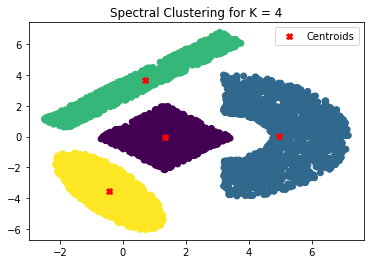

The centroids are  [[ 1.35353385 -0.06245563]
 [ 4.95412587  0.02922527]
 [ 0.71258954  3.69727645]
 [-0.43282777 -3.531065  ]]
Objective function average distance is:  1.69232621417


In [1390]:
C = Spectral_Clustering(data, K, tol2)
Y_centers = centers(K, C)
plot_clusters(data, Y_centers, C)
Dist = dist(Y_centers, C)

print ('The centroids are ', Y_centers)
print ('Objective function average distance is: ', Dist)